In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/KT_ETRI/

/content/drive/MyDrive/KT_ETRI


In [3]:
import pandas as pd
import numpy as np

In [4]:
q1_data = pd.read_csv('Q1_train.csv')
q1_test = pd.read_csv('Q1_test.csv', index_col = 0)
q1_data.head()

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,...,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax
0,2023-05-19 00:00:00,BaseStationG,0,0.0,12,12,10,10,0,0,...,10.5,22.4,47.0,47.0,17.0,2243.0,-93.3,11.1,0,1
1,2023-05-19 00:00:00,BaseStationE,0,0.0,28,28,27,27,11,11,...,19.4,8.8,174.0,174.0,39.0,2240.0,-93.5,10.2,4,5
2,2023-05-19 00:00:00,BaseStationF,1,3.7,27,27,17,17,8,8,...,15.5,6.0,137.0,137.0,53.0,1337.0,-92.7,11.3,2,6
3,2023-05-19 00:00:00,BaseStationI,0,0.0,1,1,1,1,0,0,...,8.5,5.7,259.0,259.0,5.0,1401.0,-92.8,13.6,0,1
4,2023-05-19 00:00:00,BaseStationD,0,0.0,29,29,29,29,1,1,...,18.3,9.2,51.0,51.0,35.0,2083.0,-92.7,12.4,28,4


In [5]:
q1_test.head()

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,...,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb
0,2023-05-19 00:00:00,BaseStationJ,0,0.0,5,5,5,5,0,0,...,412.0,13.3,22.4,73.0,73.0,7.0,1401.0,-93.0,9.8,0
1,2023-05-19 00:00:00,BaseStationB,0,0.0,3,3,3,3,0,0,...,1.0,0.0,0.0,5.0,5.0,4.0,2083.0,-92.8,5.9,4
2,2023-05-19 00:05:00,BaseStationJ,0,0.0,3,3,2,2,0,0,...,418.0,45.6,5.2,33.0,33.0,14.0,1312.0,-93.1,11.7,0
3,2023-05-19 00:05:00,BaseStationB,0,0.0,16,16,16,16,0,0,...,680.0,12.6,0.7,19.0,19.0,16.0,1936.0,-92.8,7.4,14
4,2023-05-19 00:10:00,BaseStationJ,0,0.0,4,4,4,4,0,0,...,184.0,12.9,2.8,52.0,52.0,6.0,1217.0,-93.1,11.1,0


In [6]:
q1_data.dtypes

datetime                               object
ru_id                                  object
scgfail                                 int64
scgfailratio                          float64
erabaddatt                              int64
erabaddsucc                             int64
endcaddatt                              int64
endcaddsucc                             int64
endcmodbymenbatt                        int64
endcmodbymenbsucc                       int64
endcmodbysgnbatt                        int64
endcmodbysgnbsucc                       int64
connestabatt                            int64
connestabsucc                           int64
redirectiontolte_coverageout            int64
redirectiontolte_epsfallback            int64
redirectiontolte_emergencyfallback      int64
handoveratt                             int64
handoversucc                            int64
reestabatt                              int64
reestabsucc                             int64
rlculbyte                         

In [7]:
q1_test.dtypes

datetime                               object
ru_id                                  object
scgfail                                 int64
scgfailratio                          float64
erabaddatt                              int64
erabaddsucc                             int64
endcaddatt                              int64
endcaddsucc                             int64
endcmodbymenbatt                        int64
endcmodbymenbsucc                       int64
endcmodbysgnbatt                        int64
endcmodbysgnbsucc                       int64
connestabatt                            int64
connestabsucc                           int64
redirectiontolte_coverageout            int64
redirectiontolte_epsfallback            int64
redirectiontolte_emergencyfallback      int64
handoveratt                             int64
handoversucc                            int64
reestabatt                              int64
reestabsucc                             int64
rlculbyte                         

#### dtype 맞게 전처리

datetime : object &rightarrow; datetime

In [8]:
q1_data['datetime'] = pd.to_datetime(q1_data['datetime'])
q1_test['datetime'] = pd.to_datetime(q1_test['datetime'])

#### ratio 변수 통일 + 변수 drop

연결 성공한 횟수 &rightarrow; 연결 성공 백분율로 변경

In [9]:
# 연결 성공한 횟수 -> 연결 성공 백분율로 변경
q1_data['erabaddratio'] = (q1_data['erabaddsucc'] / q1_data['erabaddatt']) * 100
q1_data['endcaddratio'] = (q1_data['endcaddsucc'] / q1_data['endcaddatt']) * 100
q1_data['endcmodbymenbratio'] = (q1_data['endcmodbymenbsucc'] / q1_data['endcmodbymenbatt']) * 100
q1_data['endcmodbysgnbratio'] = (q1_data['endcmodbysgnbsucc'] / q1_data['endcmodbysgnbatt']) * 100
q1_data['connestabratio'] = (q1_data['connestabsucc'] / q1_data['connestabatt']) * 100
q1_data['handoverratio'] = (q1_data['handoversucc'] / q1_data['handoveratt']) * 100
q1_data['reestabratio'] = (q1_data['reestabsucc'] / q1_data['reestabatt']) * 100

In [10]:
# 연결 성공한 횟수 -> 연결 성공 백분율로 변경
q1_test['erabaddratio'] = (q1_test['erabaddsucc'] / q1_test['erabaddatt']) * 100
q1_test['endcaddratio'] = (q1_test['endcaddsucc'] / q1_test['endcaddatt']) * 100
q1_test['endcmodbymenbratio'] = (q1_test['endcmodbymenbsucc'] / q1_test['endcmodbymenbatt']) * 100
q1_test['endcmodbysgnbratio'] = (q1_test['endcmodbysgnbsucc'] / q1_test['endcmodbysgnbatt']) * 100
q1_test['connestabratio'] = (q1_test['connestabsucc'] / q1_test['connestabatt']) * 100
q1_test['handoverratio'] = (q1_test['handoversucc'] / q1_test['handoveratt']) * 100
q1_test['reestabratio'] = (q1_test['reestabsucc'] / q1_test['reestabatt']) * 100

In [11]:
# 연결 시도한 횟수가 0이어서 성공 백분율이 nan이 된 값들을 0으로 바꿔주기
ratios = ['erabaddratio', 'endcaddratio', 'endcmodbymenbratio', 'endcmodbysgnbratio', 'connestabratio', 'handoverratio', 'reestabratio']
for i in ratios :
  q1_data[i] = q1_data[i].replace(np.nan, 0)

In [12]:
# 연결 시도한 횟수가 0이어서 성공 백분율이 nan이 된 값들을 0으로 바꿔주기
for i in ratios :
  q1_test[i] = q1_test[i].replace(np.nan, 0)

In [13]:
list = ['erabaddsucc', 'endcaddsucc', 'endcmodbymenbsucc', 'endcmodbysgnbsucc', 'connestabsucc', 'handoversucc', 'reestabsucc']
q1_data = q1_data.drop(list, axis = 1)

In [14]:
q1_test = q1_test.drop(list, axis = 1)

In [15]:
# 순서 재배치 + scgfail, redirectiontolte_emergencyfallback, numrar drop
col = q1_data.columns.to_numpy()
col = col[[0,1,3,4,32,5,33,6,34,7,35,8,36,9,10,12,37,13,38,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31]]
q1_data = q1_data[col]
q1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137445 entries, 0 to 137444
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   datetime                      137445 non-null  datetime64[ns]
 1   ru_id                         137445 non-null  object        
 2   scgfailratio                  137445 non-null  float64       
 3   erabaddatt                    137445 non-null  int64         
 4   erabaddratio                  137445 non-null  float64       
 5   endcaddatt                    137445 non-null  int64         
 6   endcaddratio                  137445 non-null  float64       
 7   endcmodbymenbatt              137445 non-null  int64         
 8   endcmodbymenbratio            137445 non-null  float64       
 9   endcmodbysgnbatt              137445 non-null  int64         
 10  endcmodbysgnbratio            137445 non-null  float64       
 11  connestabatt 

In [16]:
col = q1_test.columns.to_numpy()
col = col[[0,1,3,4,31,5,32,6,33,7,34,8,35,9,10,12,36,13,37,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30]]
q1_test = q1_test[col]
q1_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34362 entries, 0 to 34361
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   datetime                      34362 non-null  datetime64[ns]
 1   ru_id                         34362 non-null  object        
 2   scgfailratio                  34362 non-null  float64       
 3   erabaddatt                    34362 non-null  int64         
 4   erabaddratio                  34362 non-null  float64       
 5   endcaddatt                    34362 non-null  int64         
 6   endcaddratio                  34362 non-null  float64       
 7   endcmodbymenbatt              34362 non-null  int64         
 8   endcmodbymenbratio            34362 non-null  float64       
 9   endcmodbysgnbatt              34362 non-null  int64         
 10  endcmodbysgnbratio            34362 non-null  float64       
 11  connestabatt                

#### 결측치

test 데이터에는 결측치 없음

In [17]:
q1_data.isna().sum()

datetime                        0
ru_id                           0
scgfailratio                    0
erabaddatt                      0
erabaddratio                    0
endcaddatt                      0
endcaddratio                    0
endcmodbymenbatt                0
endcmodbymenbratio              0
endcmodbysgnbatt                0
endcmodbysgnbratio              0
connestabatt                    0
connestabratio                  0
redirectiontolte_coverageout    0
redirectiontolte_epsfallback    0
handoveratt                     0
handoverratio                   0
reestabatt                      0
reestabratio                    0
rlculbyte                       9
rlcdlbyte                       9
totprbulavg                     9
totprbdlavg                     9
dlreceivedriavg                 9
dltransmittedmcsavg             9
airmaculbyte                    9
airmacdlbyte                    9
bler_ul                         9
bler_dl                         9
rachpreamblea 

**선형 보간법**

In [18]:
# 결측치 전후의 패턴이 변화하는 구간인 경우에는
# 직전값, 직후값, 평균/중앙값 같은 방식으로 처리할 경우 문제가 발생
# 선형 보간법 사용해보겠음!

In [19]:
from scipy import interpolate

In [20]:
q1_data['rlculbyte'] = q1_data['rlculbyte'].interpolate(method='linear')
q1_data['rlcdlbyte'] = q1_data['rlcdlbyte'].interpolate(method='linear')
q1_data['totprbulavg'] = q1_data['totprbulavg'].interpolate(method='linear')
q1_data['totprbdlavg'] = q1_data['totprbdlavg'].interpolate(method='linear')
q1_data['dlreceivedriavg'] = q1_data['dlreceivedriavg'].interpolate(method='linear')
q1_data['dltransmittedmcsavg'] = q1_data['dltransmittedmcsavg'].interpolate(method='linear')
q1_data['airmaculbyte'] = q1_data['airmaculbyte'].interpolate(method='linear')
q1_data['airmacdlbyte'] = q1_data['airmacdlbyte'].interpolate(method='linear')
q1_data['bler_ul'] = q1_data['bler_ul'].interpolate(method='linear')
q1_data['bler_dl'] = q1_data['bler_dl'].interpolate(method='linear')
q1_data['rachpreamblea'] = q1_data['rachpreamblea'].interpolate(method='linear')
q1_data['nummsg3'] = q1_data['nummsg3'].interpolate(method='linear')
q1_data['attpaging'] = q1_data['attpaging'].interpolate(method='linear')
q1_data['rssipathavg'] = q1_data['rssipathavg'].interpolate(method='linear')
q1_data['dlreceivedcqiavg'] = q1_data['dlreceivedcqiavg'].interpolate(method='linear')

In [21]:
#B,J와 유사한 기지국을 찾기 위해서 데이터 합침
q1_data_a=q1_data.iloc[:,:-1]
q1_all = pd.concat([q1_data_a,q1_test])

In [22]:
q1_all.tail()

,datetime,ru_id,scgfailratio,erabaddatt,erabaddratio,endcaddatt,endcaddratio,endcmodbymenbatt,endcmodbymenbratio,endcmodbysgnbatt,...,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb
34357,2023-07-17 15:40:00,BaseStationB,6.7,15,100.0,14,100.0,2,100.0,16,...,120.0,820.0,20.1,3.4,21.0,18.0,8687.0,-92.4,7.1,13
34358,2023-07-17 15:45:00,BaseStationJ,0.0,7,100.0,7,100.0,0,0.0,1,...,43.0,389.0,23.4,3.5,98.0,7.0,5441.0,-92.7,11.0,0
34359,2023-07-17 15:45:00,BaseStationB,0.0,17,100.0,15,100.0,3,100.0,26,...,122.0,26171.0,15.8,14.9,21.0,18.0,8706.0,-91.7,7.0,14
34360,2023-07-17 15:50:00,BaseStationJ,0.0,13,100.0,12,100.0,0,0.0,6,...,67.0,53.0,17.1,4.6,56.0,15.0,5751.0,-92.6,11.3,0
34361,2023-07-17 15:50:00,BaseStationB,0.0,21,100.0,21,100.0,1,100.0,23,...,78.0,22267.0,5.7,8.8,37.0,26.0,9040.0,-92.2,7.6,22


In [25]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchtext
import time
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [30]:
Q1_A=q1_data[q1_data['ru_id']=='BaseStationA']
Q1_C=q1_data[q1_data['ru_id']=='BaseStationC']
Q1_D=q1_data[q1_data['ru_id']=='BaseStationD']

<ipython-input-26-946e906a1b36>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Q1_A1.corr(), linewidths = 0.1, vmax = 1.0,


<Axes: >

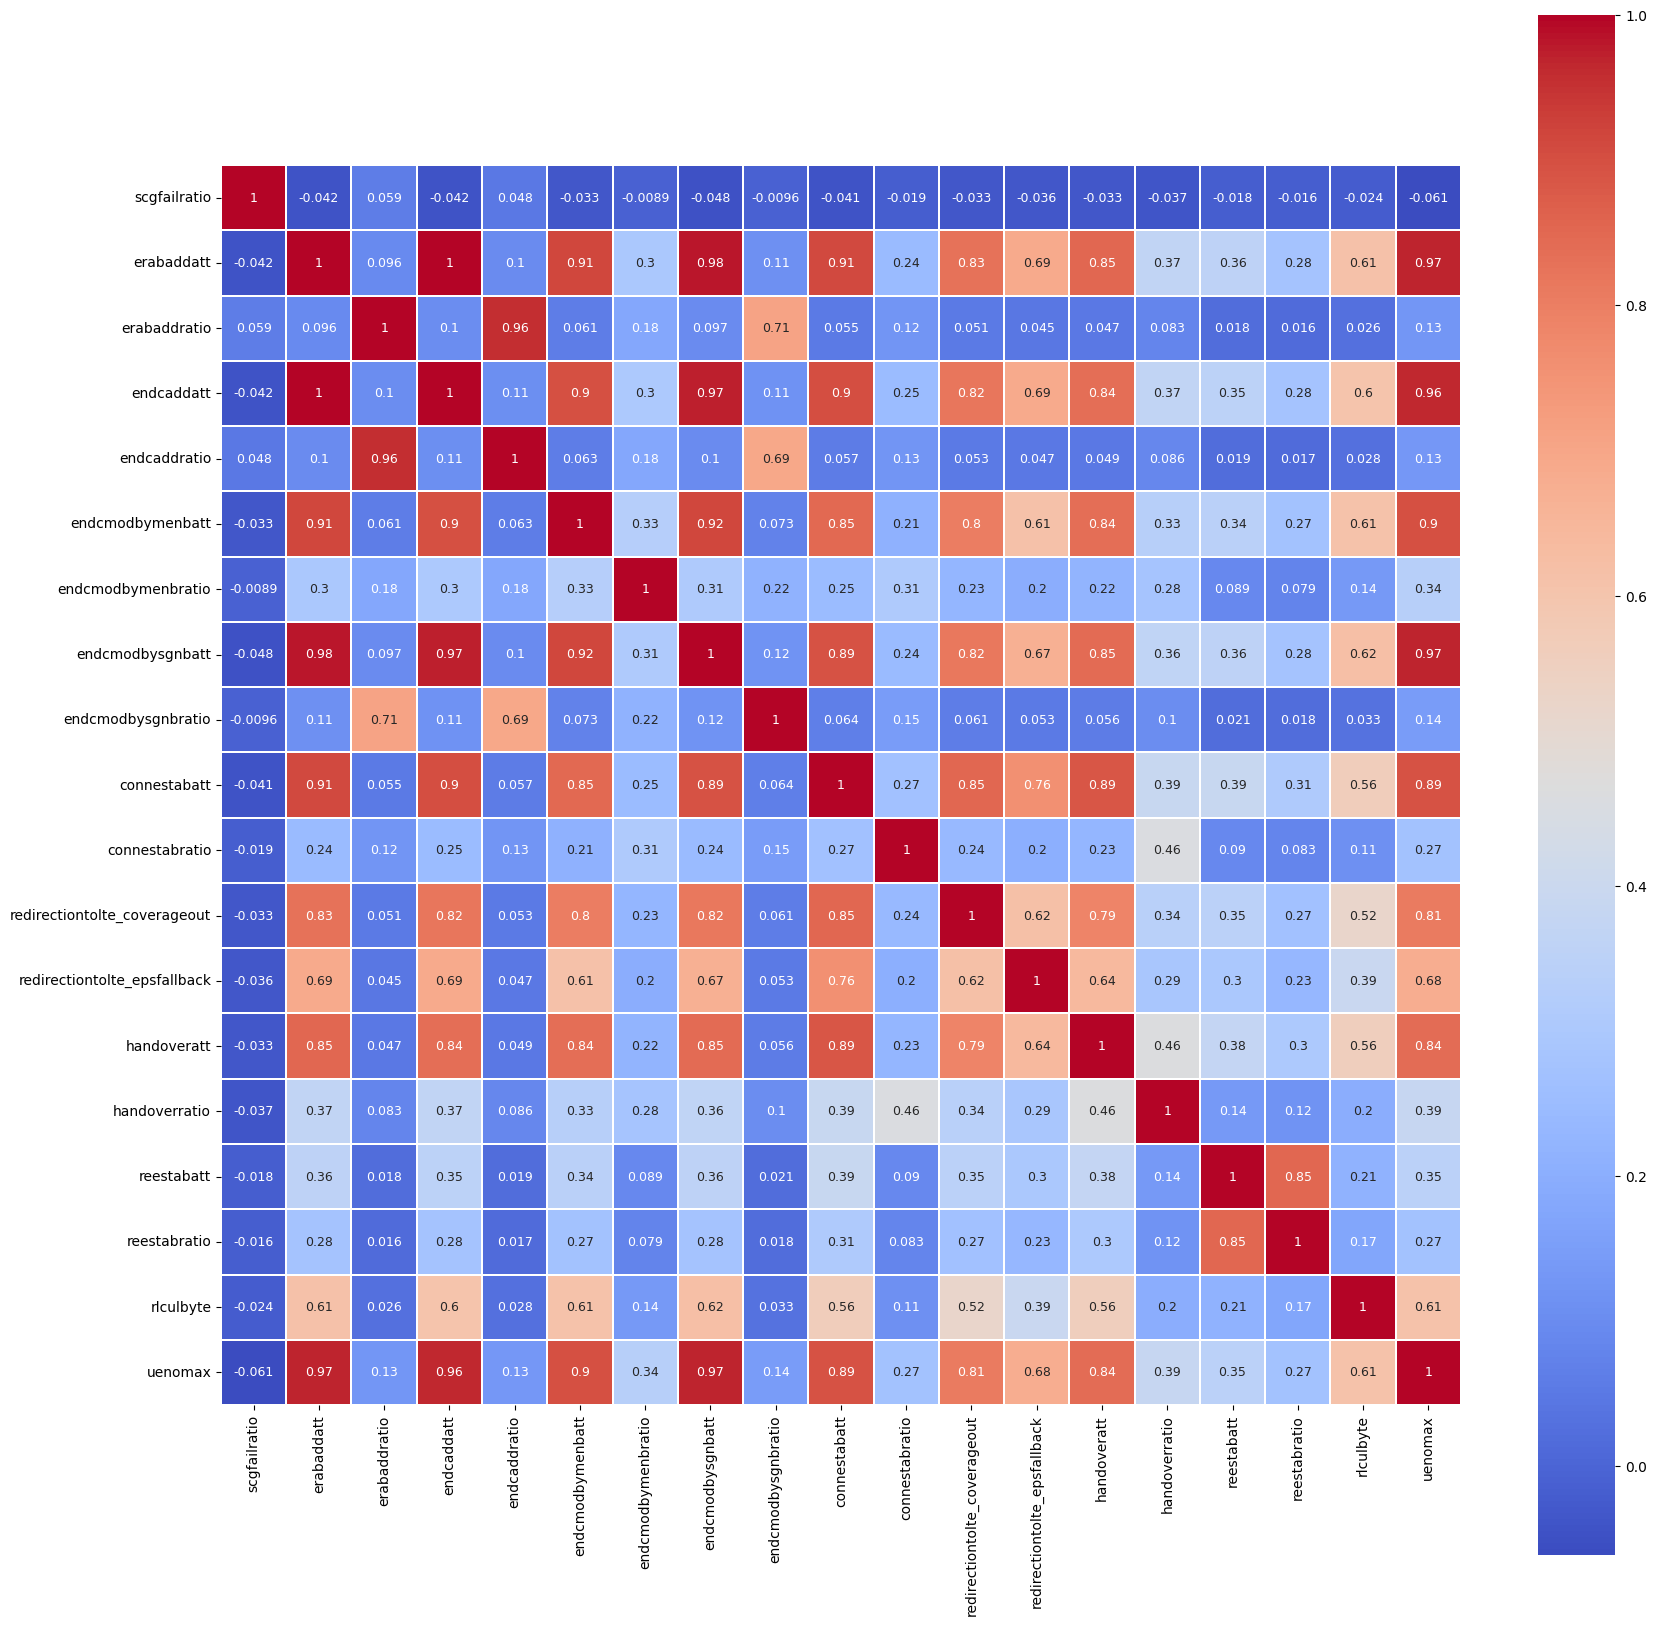

In [26]:
Q1_A=q1_data[q1_data['ru_id']=='BaseStationA']
Q1_A=q1_data[q1_data['ru_id']=='BaseStationA']
Q1_A1=Q1_A.iloc[:,0:20]
Q1_A1 = pd.concat([Q1_A1 ,Q1_A['uenomax']],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(Q1_A1.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'coolwarm', linecolor = "white", annot = True, annot_kws = {"size" : 9})

<Axes: >

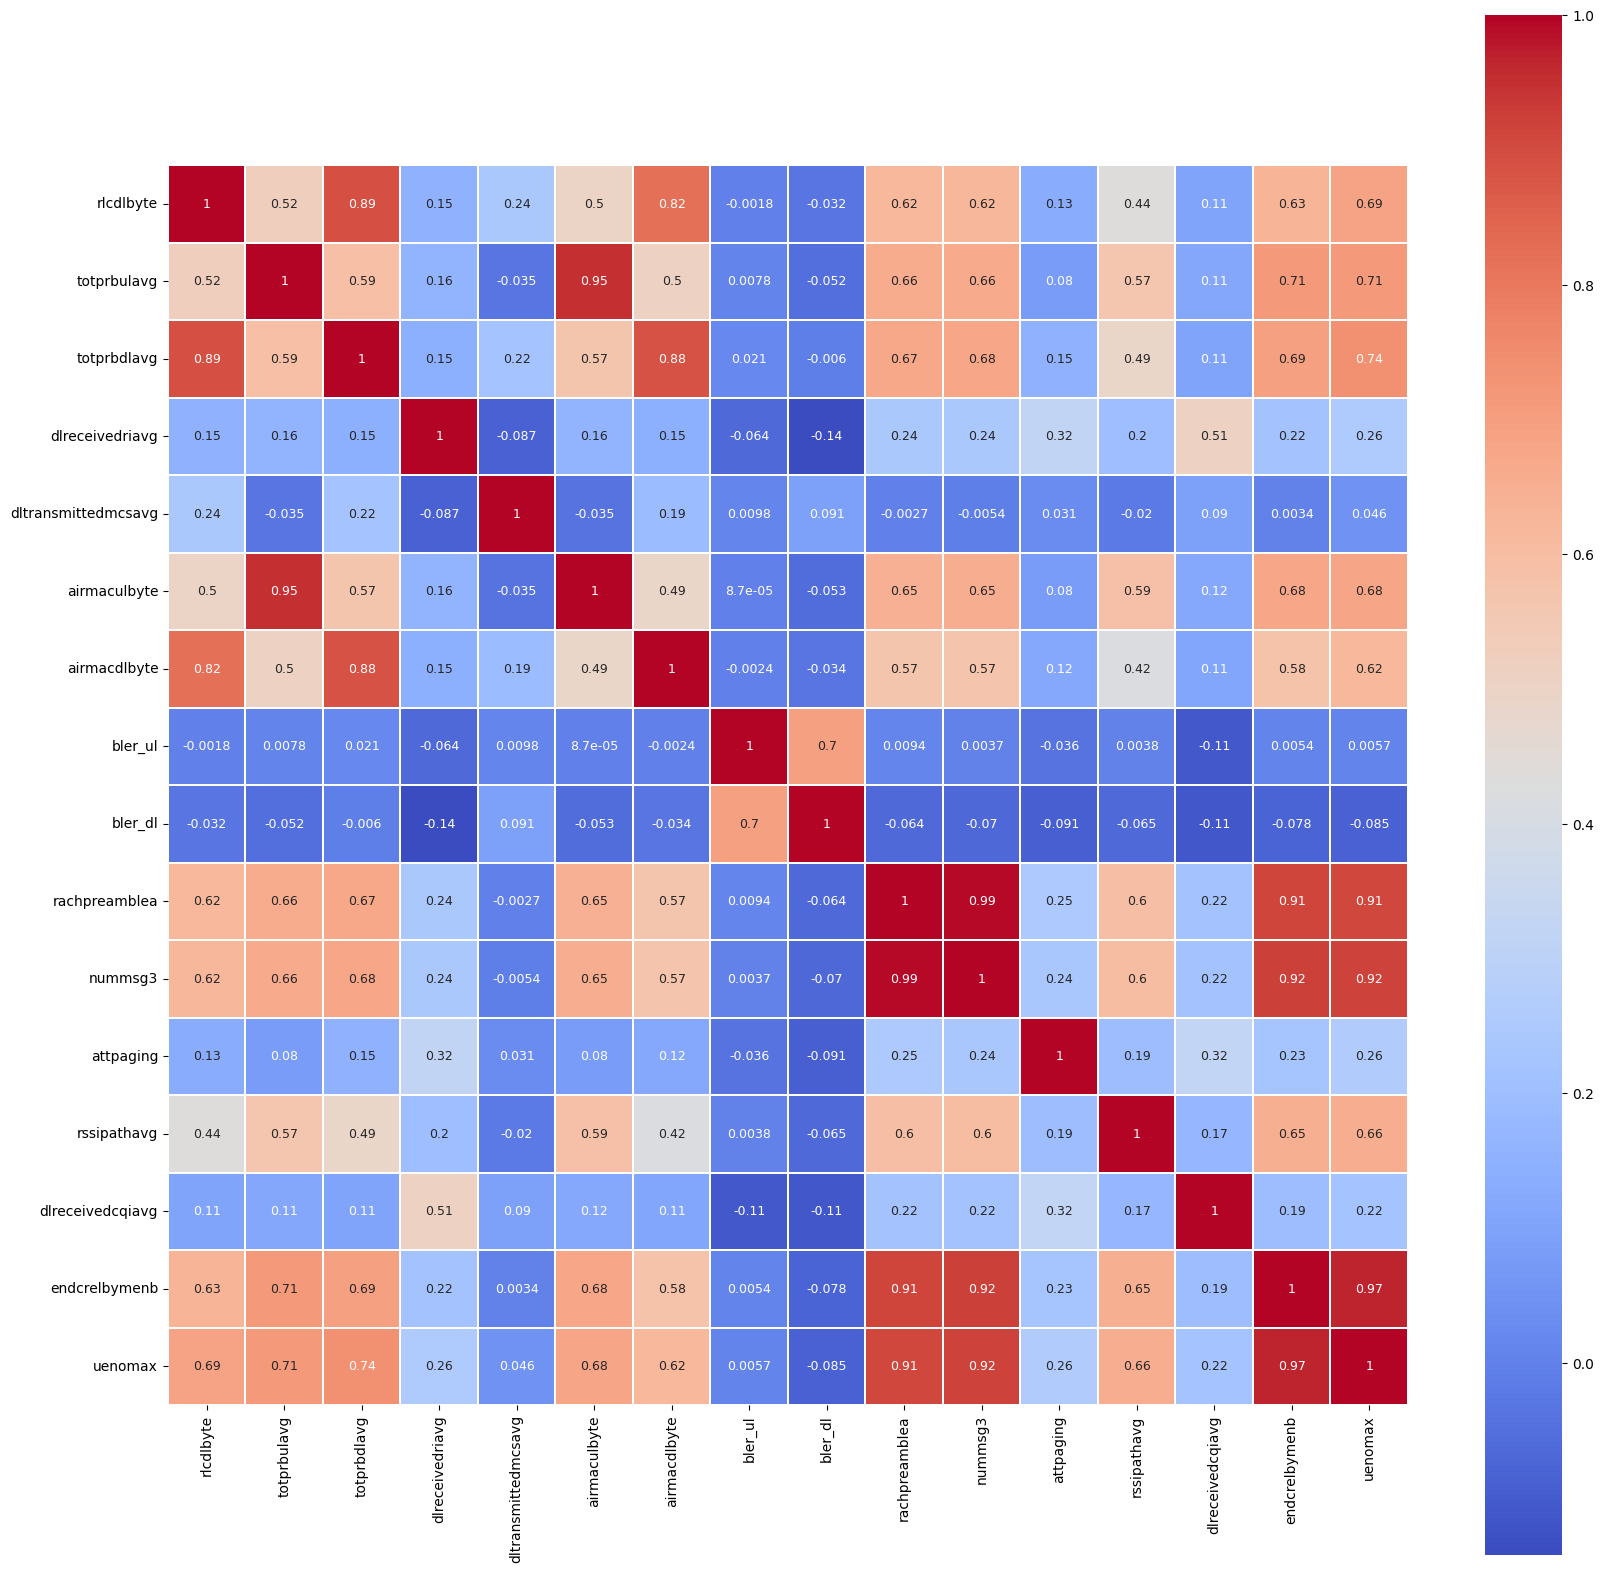

In [27]:
Q1_A2=Q1_A.iloc[:,20:]
plt.figure(figsize=(20,20))
colormap = plt.cm.PuBu
sns.heatmap(Q1_A2.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'coolwarm', linecolor = "white", annot = True, annot_kws = {"size" : 9})

# **시계열 모델링**

Text(0, 0.5, 'uenomax')

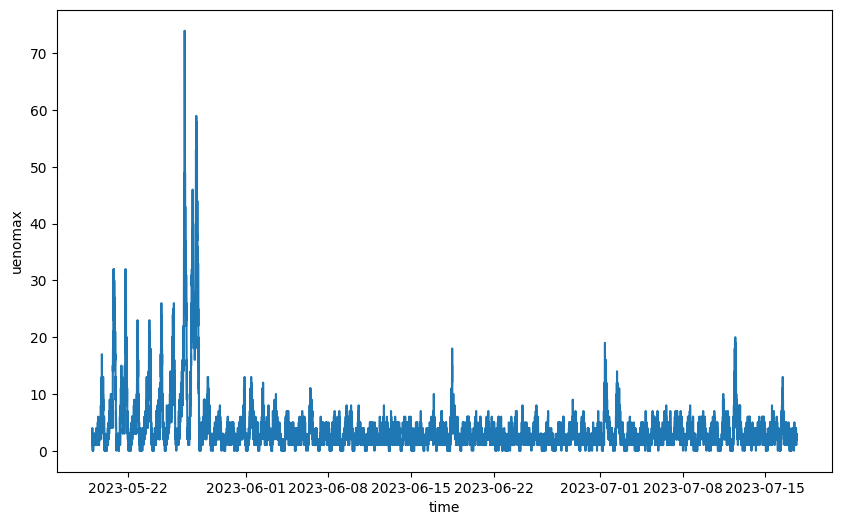

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(y=Q1_A['uenomax'], x=Q1_A['datetime'])
plt.xlabel('time')
plt.ylabel('uenomax')

Text(0, 0.5, 'uenomax')

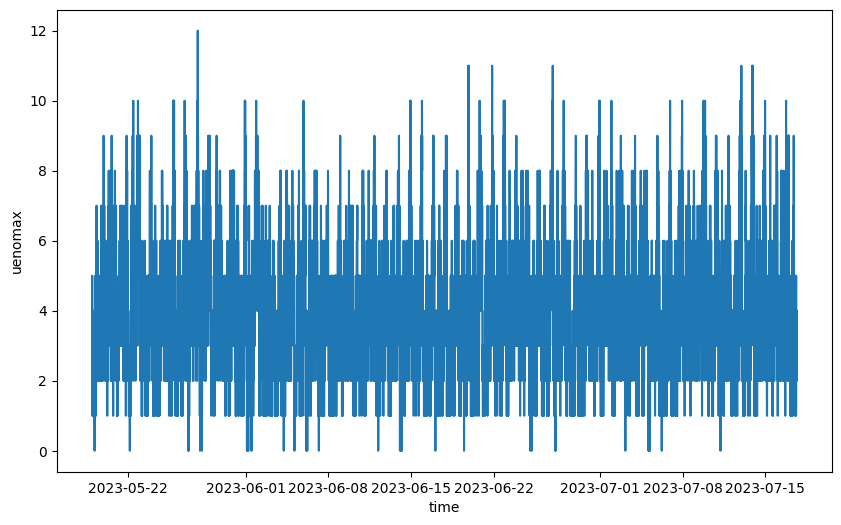

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(y=Q1_C['uenomax'], x=Q1_C['datetime'])
plt.xlabel('time')
plt.ylabel('uenomax')

**파이토치를 이용한 LSTM**

**BaseStationA**

In [32]:
Q1_A=q1_data[q1_data['ru_id']=='BaseStationA']
Q1_C=q1_data[q1_data['ru_id']=='BaseStationC']
Q1_D=q1_data[q1_data['ru_id']=='BaseStationD']

In [33]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [34]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

seq_length = 24 # 5*24=120 2시간 간격으로 데이터가 입력으로 들어감
batch = 50 # 임의로 줌

# train : test = 7 : 3
Q1_A1=Q1_A.iloc[:,2:]
train_size = int(len(Q1_A1)*0.7)
train_set = Q1_A1[0:train_size]
test_set = Q1_A1[train_size-seq_length:]

# Input scale
scaler_x = MinMaxScaler()
scaler_x.fit(train_set.iloc[:, :-1])

train_set.iloc[:, :-1] = scaler_x.transform(train_set.iloc[:, :-1])
test_set.iloc[:, :-1] = scaler_x.transform(test_set.iloc[:, :-1])

# Output scale
scaler_y = MinMaxScaler()
scaler_y.fit(train_set.iloc[:, [-1]])

train_set.iloc[:, -1] = scaler_y.transform(train_set.iloc[:, [-1]])
test_set.iloc[:, -1] = scaler_y.transform(test_set.iloc[:, [-1]])

<ipython-input-34-dd07d7114e62>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.iloc[:, :-1] = scaler_x.transform(train_set.iloc[:, :-1])
<ipython-input-34-dd07d7114e62>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.iloc[:, :-1] = scaler_x.transform(test_set.iloc[:, :-1])
<ipython-input-34-dd07d7114e62>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [35]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

# 데이터셋 생성 함수
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series)-seq_length):
        _x = time_series[i:i+seq_length, :]
        _y = time_series[i+seq_length, [-1]]
        # print(_x, "-->",_y)
        dataX.append(_x)
        dataY.append(_y)

    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(np.array(train_set), seq_length)
testX, testY = build_dataset(np.array(test_set), seq_length)

trainX.shape

(12002, 24, 34)

In [36]:
# 텐서로 변환
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

# 텐서 형태로 데이터 정의
dataset = TensorDataset(trainX_tensor, trainY_tensor)

# 데이터로더는 기본적으로 2개의 인자를 입력받으며 배치크기는 통상적으로 2의 배수를 사용
dataloader = DataLoader(dataset,
                        batch_size=batch,
                        shuffle=True,
                        drop_last=True)

In [37]:
data_dim = 34    # 입력 column
hidden_dim = 10 # 은닉층
output_dim = 1  # 출력층
learning_rate = 0.01
nb_epochs = 50

## LSTM 네트워크
class Net(nn.Module):
    # # 기본변수, layer를 초기화해주는 생성자
    def __init__(self, input_dim, hidden_dim, seq_len, output_dim, layers):
        super(Net, self).__init__()
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.output_dim = output_dim
        self.layers = layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=layers,
                            # dropout = 0.1,
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim, bias = True)

    # 학습 초기화를 위한 함수
    def reset_hidden_state(self):
        self.hidden = (
                torch.zeros(self.layers, self.seq_len, self.hidden_dim),
                torch.zeros(self.layers, self.seq_len, self.hidden_dim))

    # 예측을 위한 함수
    def forward(self, x):
        x, _status = self.lstm(x)
        x = self.fc(x[:, -1])
        return x

In [38]:
def train_model(model, train_df, num_epochs = None, lr = None, verbose = 10, patience = 10):

    criterion = nn.L1Loss().to(device) # 평가기준 : MAE
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    nb_epochs = num_epochs

    # epoch마다 loss 저장
    train_hist = np.zeros(nb_epochs)

    for epoch in range(nb_epochs):
        avg_cost = 0
        total_batch = len(train_df)

        for batch_idx, samples in enumerate(train_df):

            x_train, y_train = samples

            # seq별 hidden state reset
            model.reset_hidden_state()

            # H(x) 계산
            outputs = model(x_train)

            # cost 계산
            loss = criterion(outputs, y_train)

            # cost로 H(x) 개선
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            avg_cost += loss/total_batch

        train_hist[epoch] = avg_cost

        if epoch % verbose == 0:
            print('Epoch:', '%04d' % (epoch), 'train loss :', '{:.4f}'.format(avg_cost))

        # patience번째 마다 early stopping 여부 확인
        if (epoch % patience == 0) & (epoch != 0):

            # loss가 커졌다면 early stop
            if train_hist[epoch-patience] < train_hist[epoch]:
                print('\n Early Stopping')

                break

    return model.eval(), train_hist

In [39]:
net = Net(data_dim, hidden_dim, seq_length, output_dim, 1).to(device)
model, train_hist = train_model(net, dataloader, num_epochs = nb_epochs, lr = learning_rate, verbose = 20, patience = 10)

Epoch: 0000 train loss : 0.0212
Epoch: 0020 train loss : 0.0123

 Early Stopping


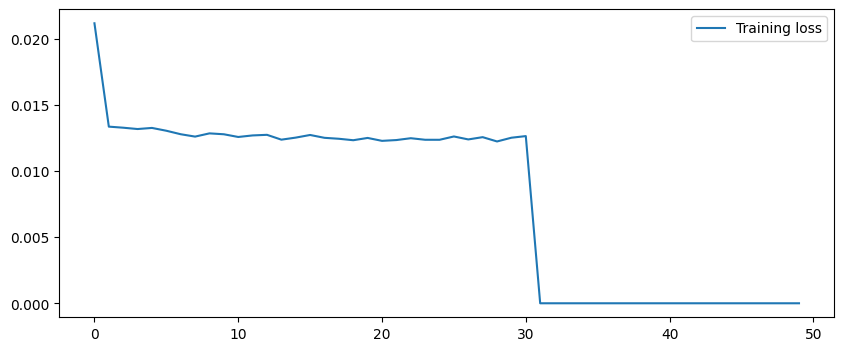

In [40]:
# epoch별 손실값 -> 손실값이 뚝떨어지는 이유가 있을까?
fig = plt.figure(figsize=(10, 4))
plt.plot(train_hist, label="Training loss")
plt.legend()
plt.show()

In [41]:
# 예측 테스트
with torch.no_grad(): # gradient 계산 수행 x -> 메모리 사용안하도록
    pred = []
    for pr in range(len(testX_tensor)):

        model.reset_hidden_state() # 순환 레이어의 은닉 상태 초기화

        predicted = model(torch.unsqueeze(testX_tensor[pr], 0))
        predicted = torch.flatten(predicted).item()
        pred.append(predicted)

    # [INVERSE] 모델이 예측한 값을 다시 스케일 역변환하여 원래 스케일로 되돌립
    pred_inverse = scaler_y.inverse_transform(np.array(pred).reshape(-1, 1))
    testY_inverse = scaler_y.inverse_transform(testY_tensor)

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAE SCORE : ', MAE(pred_inverse, testY_inverse))

MAE SCORE :  0.8542020456657666


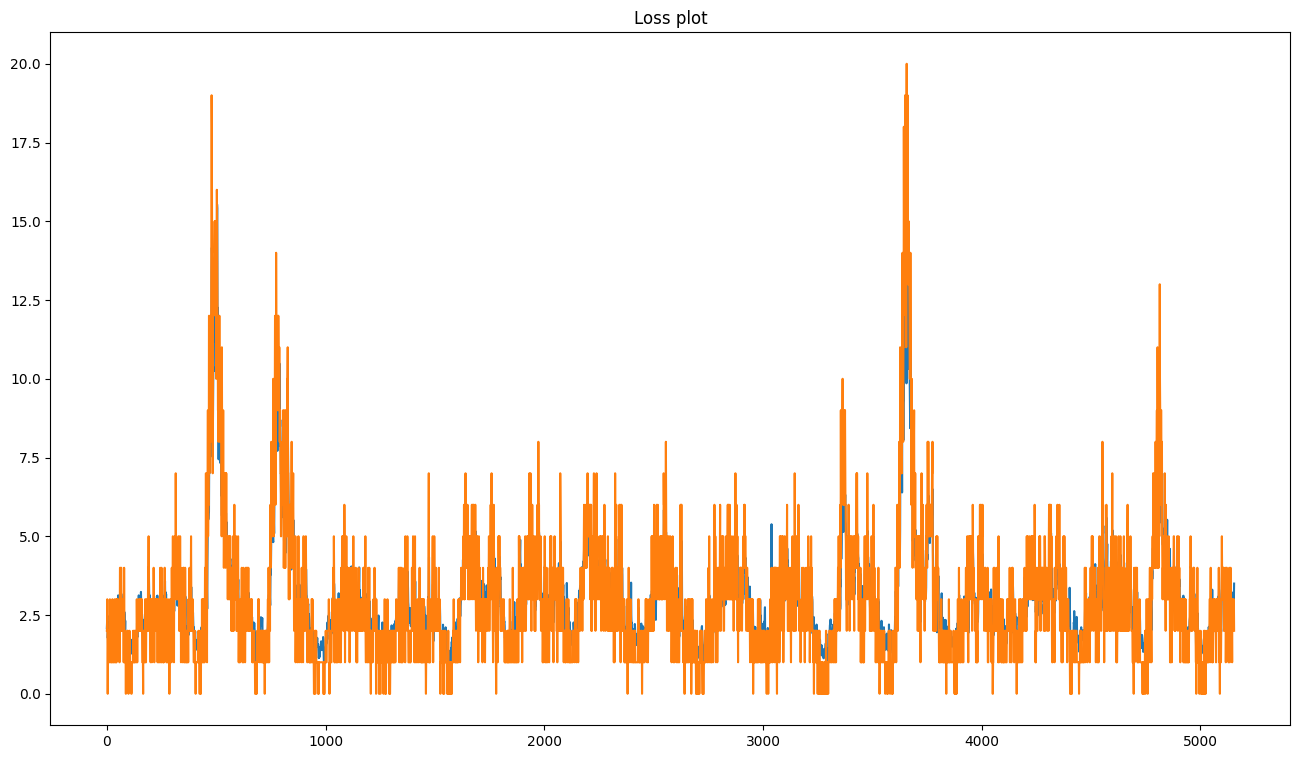

In [42]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(len(pred_inverse)), pred_inverse, label = 'pred')
plt.plot(np.arange(len(testY_inverse)), testY_inverse, label = 'true')
plt.title("Loss plot")
plt.show()

**BaseStationC 모델링**

In [43]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

seq_length = 24 # 5*24=120 2시간 간격으로 데이터가 입력으로 들어감
batch = 50 # 임의로 줌

# train : test = 7 : 3
Q1_C1=Q1_C.iloc[:,2:]
train_size = int(len(Q1_C1)*0.7)
train_set = Q1_C1[0:train_size]
test_set = Q1_C1[train_size-seq_length:]

# Input scale
scaler_x = MinMaxScaler()
scaler_x.fit(train_set.iloc[:, :-1])

train_set.iloc[:, :-1] = scaler_x.transform(train_set.iloc[:, :-1])
test_set.iloc[:, :-1] = scaler_x.transform(test_set.iloc[:, :-1])

# Output scale
scaler_y = MinMaxScaler()
scaler_y.fit(train_set.iloc[:, [-1]])

train_set.iloc[:, -1] = scaler_y.transform(train_set.iloc[:, [-1]])
test_set.iloc[:, -1] = scaler_y.transform(test_set.iloc[:, [-1]])

<ipython-input-43-4f28e865e41e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.iloc[:, :-1] = scaler_x.transform(train_set.iloc[:, :-1])
<ipython-input-43-4f28e865e41e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.iloc[:, :-1] = scaler_x.transform(test_set.iloc[:, :-1])
<ipython-input-43-4f28e865e41e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [44]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

# 데이터셋 생성 함수
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series)-seq_length):
        _x = time_series[i:i+seq_length, :]
        _y = time_series[i+seq_length, [-1]]
        # print(_x, "-->",_y)
        dataX.append(_x)
        dataY.append(_y)

    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(np.array(train_set), seq_length)
testX, testY = build_dataset(np.array(test_set), seq_length)

trainX.shape

(12002, 24, 34)

In [45]:
# 텐서로 변환
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

# 텐서 형태로 데이터 정의
dataset = TensorDataset(trainX_tensor, trainY_tensor)

# 데이터로더는 기본적으로 2개의 인자를 입력받으며 배치크기는 통상적으로 2의 배수를 사용
dataloader = DataLoader(dataset,
                        batch_size=batch,
                        shuffle=True,
                        drop_last=True)

In [46]:
data_dim = 34    # 입력 column
hidden_dim = 10 # 은닉층
output_dim = 1  # 출력층
learning_rate = 0.01
nb_epochs = 50

## LSTM 네트워크
class Net(nn.Module):
    # # 기본변수, layer를 초기화해주는 생성자
    def __init__(self, input_dim, hidden_dim, seq_len, output_dim, layers):
        super(Net, self).__init__()
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.output_dim = output_dim
        self.layers = layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=layers,
                            # dropout = 0.1,
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim, bias = True)

    # 학습 초기화를 위한 함수
    def reset_hidden_state(self):
        self.hidden = (
                torch.zeros(self.layers, self.seq_len, self.hidden_dim),
                torch.zeros(self.layers, self.seq_len, self.hidden_dim))

    # 예측을 위한 함수
    def forward(self, x):
        x, _status = self.lstm(x)
        x = self.fc(x[:, -1])
        return x

In [47]:
def train_model(model, train_df, num_epochs = None, lr = None, verbose = 10, patience = 10):

    criterion = nn.L1Loss().to(device) # 평가기준 : MAE
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    nb_epochs = num_epochs

    # epoch마다 loss 저장
    train_hist = np.zeros(nb_epochs)

    for epoch in range(nb_epochs):
        avg_cost = 0
        total_batch = len(train_df)

        for batch_idx, samples in enumerate(train_df):

            x_train, y_train = samples

            # seq별 hidden state reset
            model.reset_hidden_state()

            # H(x) 계산
            outputs = model(x_train)

            # cost 계산
            loss = criterion(outputs, y_train)

            # cost로 H(x) 개선
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            avg_cost += loss/total_batch

        train_hist[epoch] = avg_cost

        if epoch % verbose == 0:
            print('Epoch:', '%04d' % (epoch), 'train loss :', '{:.4f}'.format(avg_cost))

        # patience번째 마다 early stopping 여부 확인
        if (epoch % patience == 0) & (epoch != 0):

            # loss가 커졌다면 early stop
            if train_hist[epoch-patience] < train_hist[epoch]:
                print('\n Early Stopping')

                break

    return model.eval(), train_hist

In [48]:
net = Net(data_dim, hidden_dim, seq_length, output_dim, 1).to(device)
model, train_hist = train_model(net, dataloader, num_epochs = nb_epochs, lr = learning_rate, verbose = 20, patience = 10)

Epoch: 0000 train loss : 0.0837
Epoch: 0020 train loss : 0.0695
Epoch: 0040 train loss : 0.0684

 Early Stopping


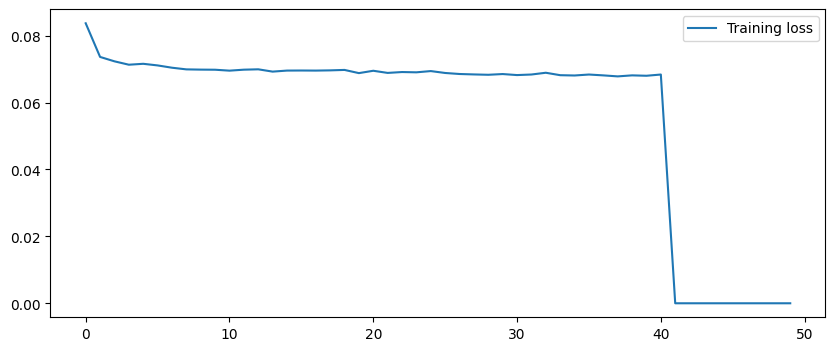

In [49]:
# epoch별 손실값
fig = plt.figure(figsize=(10, 4))
plt.plot(train_hist, label="Training loss")
plt.legend()
plt.show()

In [50]:
# 예측 테스트
with torch.no_grad(): # gradient 계산 수행 x -> 메모리 사용안하도록
    pred = []
    for pr in range(len(testX_tensor)):

        model.reset_hidden_state() # 순환 레이어의 은닉 상태 초기화

        predicted = model(torch.unsqueeze(testX_tensor[pr], 0))
        predicted = torch.flatten(predicted).item()
        pred.append(predicted)

    # [INVERSE] 모델이 예측한 값을 다시 스케일 역변환하여 원래 스케일로 되돌립
    pred_inverse = scaler_y.inverse_transform(np.array(pred).reshape(-1, 1))
    testY_inverse = scaler_y.inverse_transform(testY_tensor)

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAE SCORE : ', MAE(pred_inverse, testY_inverse))

MAE SCORE :  0.8662008063406995


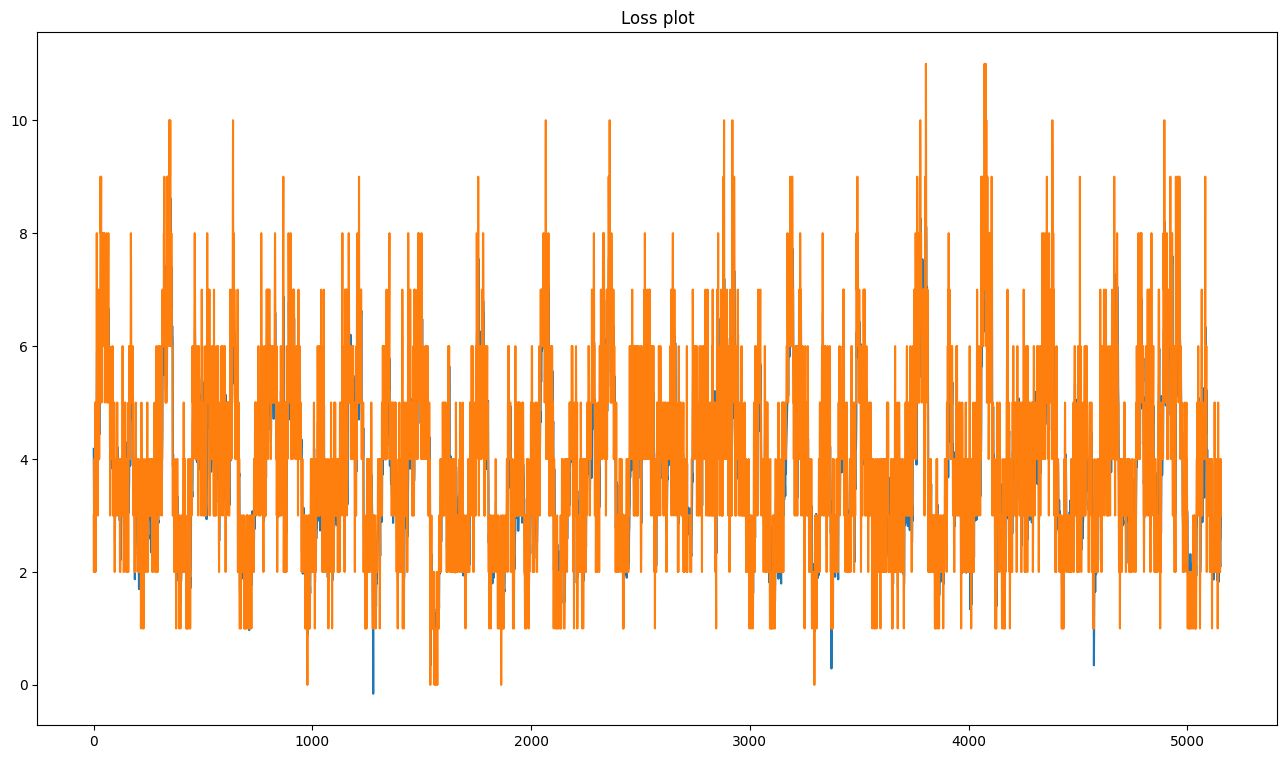

In [51]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(len(pred_inverse)), pred_inverse, label = 'pred')
plt.plot(np.arange(len(testY_inverse)), testY_inverse, label = 'true')
plt.title("Loss plot")
plt.show()